In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# df = pd.read_csv('/home/eduardo/TESIS/git/AutoNOMOS/src/histogramfilter_mov20_mejor.txt', sep='\t')
df = pd.read_csv('/home/eduardo/TESIS/git/AutoNOMOS/src/histogramfilter.txt', sep='\t')

In [50]:
df.head()

,Unnamed: 0,Est_0,Est_1,Est_2,Est_3,Est_4,Est_5,Est_6,Est_7,Est_8,...,dist_x_prob,pix_x_prob,state,ctrl_st,car_or,pose_x,pose_y,pose_yaw,diff_x_real,pix_x_real
0,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.0,0.0,-0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000
1,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.0,0.0,-0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000
2,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.0,0.0,-0.0,0.0,0.0,0.69983,-10.51894,1.57071,0.69983,101.73045
3,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.0,0.0,-0.0,0.0,0.0,0.69983,-10.51893,1.57072,-0.00000,-0.00018
4,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.0,0.0,-0.0,0.0,0.0,0.69982,-10.51892,1.57072,-0.00000,-0.00014


/home/eduardo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


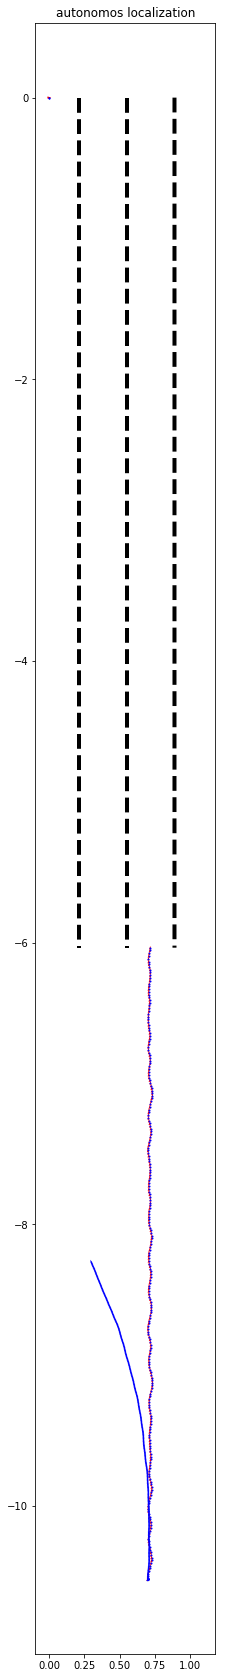

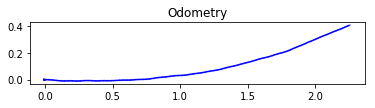

In [53]:
# from numpy import ma
inicio = 0 
fin = 1000
X = df['pose_x'].values[inicio:fin]
Y = df['pose_y'].values[inicio:fin]
Yaw = df['pose_yaw'].values[inicio:fin]
localization_hist = df.iloc[inicio:fin, 1:155].as_matrix()

# X: 0.70003	Y: -10.51972
odom_X = df['odom_x'].values[inicio:fin]
odom_Y = df['odom_y'].values[inicio:fin]
odom_Yaw = df['odom_theta'].values[inicio:fin]

odom_x_corr = 0.7 - odom_Y
odom_y_corr = -10.51972 + odom_X

U = np.cos(Yaw)
V = np.sin(Yaw)

odom_U = np.cos(odom_Yaw)
odom_V = np.sin(odom_Yaw)

odom_U_c = np.cos(1.57 + odom_Yaw)
odom_V_c = np.sin(1.57 + odom_Yaw)

#width = 1
#arrow_widths = [width]*81

right_x = [0.888914, 0.888918]
center_x = [0.552892, 0.552892]
left_x = [0.2097, 0.2097]
lines_y = [Y[0], Y[len(Y)-1]] 
out_road_dist = 0.252
cell_width = ((right_x[0] + out_road_dist) - (left_x[0] - out_road_dist)) / 154
cell_height = abs(np.mean([Y[i] - Y[i + 1] for i in range(len(Y)-1)]))

points_x = np.arange(left_x[0] - out_road_dist, right_x[0] + out_road_dist, cell_width)
grid_x, grid_y = np.meshgrid(points_x, np.arange(Y[0], Y[len(Y)-1], cell_height))

plt.figure(figsize=(20, 30))
plt.title("autonomos localization")

# show points of rotation

z = localization_hist.flatten() * 254
#scaled_z = (z - z.min()) / z.ptp()
colors = plt.cm.get_cmap('Blues')(z)
plt.scatter(grid_x, grid_y,  marker=',', s=10, c=colors)

plt.plot(right_x, lines_y,  'k--', linewidth=4)
plt.plot(center_x, lines_y,  'k--', linewidth=4)
plt.plot(left_x, lines_y,  'k--', linewidth=4)

#for x_i in points_x:
#    plt.axvline(x=x_i, linewidth=1, color='k')

# global pose
Q = plt.quiver(X, Y, U, V, color='r', pivot='mid', units='xy', scale=40, width=.009)
# odometry
Q = plt.quiver(odom_x_corr, odom_y_corr, odom_U_c, odom_V_c, color='b', pivot='mid', units='xy', scale=40, width=.009)

plt.scatter(X, Y, color='b', s=1)
#qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')

plt.axes().set_xlim([-0.1, 1.18])
plt.axes().set_aspect('equal')


f, ax = plt.subplots() # figsize=(20, 30)
Q = ax.quiver(odom_X, odom_Y, odom_U, odom_V, color='b', pivot='mid', 
              units='xy', scale=40, width=.009)

ax.set_title("Odometry")
ax.set_aspect('equal')

plt.show()